In [96]:
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)
directory_path = '/content/drive/My Drive/Colab Notebooks/prototype'
os.listdir(directory_path)

Mounted at /content/drive


['HDFC.csv', 'linear_regression_model.pkl']

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import os

In [97]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prototype/HDFC.csv')

In [98]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [99]:
df.shape

(5306, 15)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 750.8+ KB


Data Preview:
           Symbol Series  Prev Close   Open    High    Low   Last   Close  \
Date                                                                        
2000-01-03   HDFC     EQ      271.75  293.5  293.50  293.5  293.5  293.50   
2000-01-04   HDFC     EQ      293.50  317.0  317.00  297.0  304.0  304.05   
2000-01-05   HDFC     EQ      304.05  290.0  303.90  285.0  295.0  292.80   
2000-01-06   HDFC     EQ      292.80  301.0  314.00  295.0  296.0  296.45   
2000-01-07   HDFC     EQ      296.45  290.0  296.35  281.0  287.1  286.55   

              VWAP  Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                   
2000-01-03  293.50   22744  6.675364e+11     NaN                 NaN   
2000-01-04  303.62  255251  7.749972e+12     NaN                 NaN   
2000-01-05  294.53  269087  7.925368e+12     NaN                 NaN   
2000-01-06  300.14  305916  9.181669e+12     NaN                 NaN   
2000-01-07  28

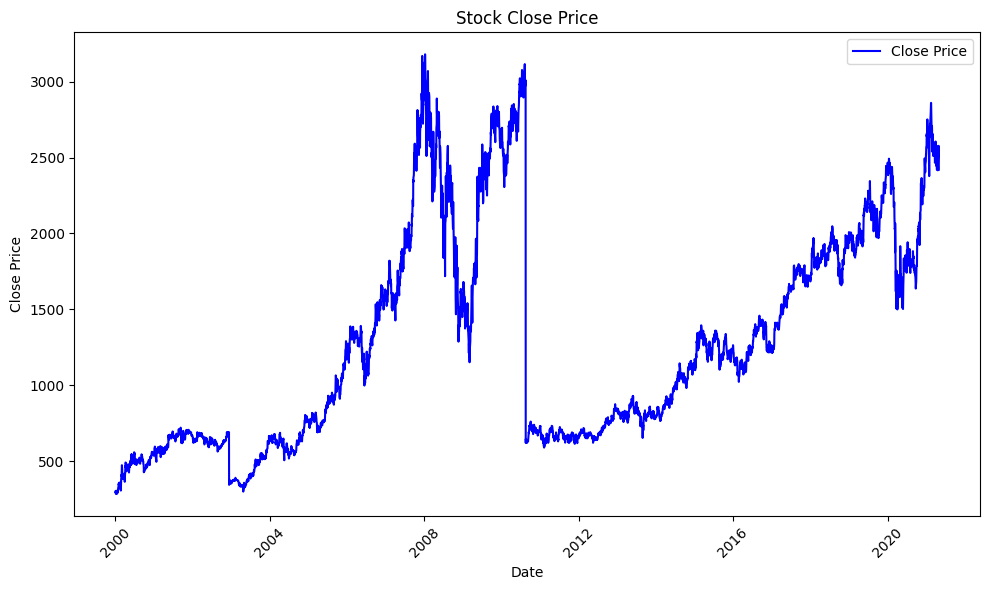

Predictions Plot:


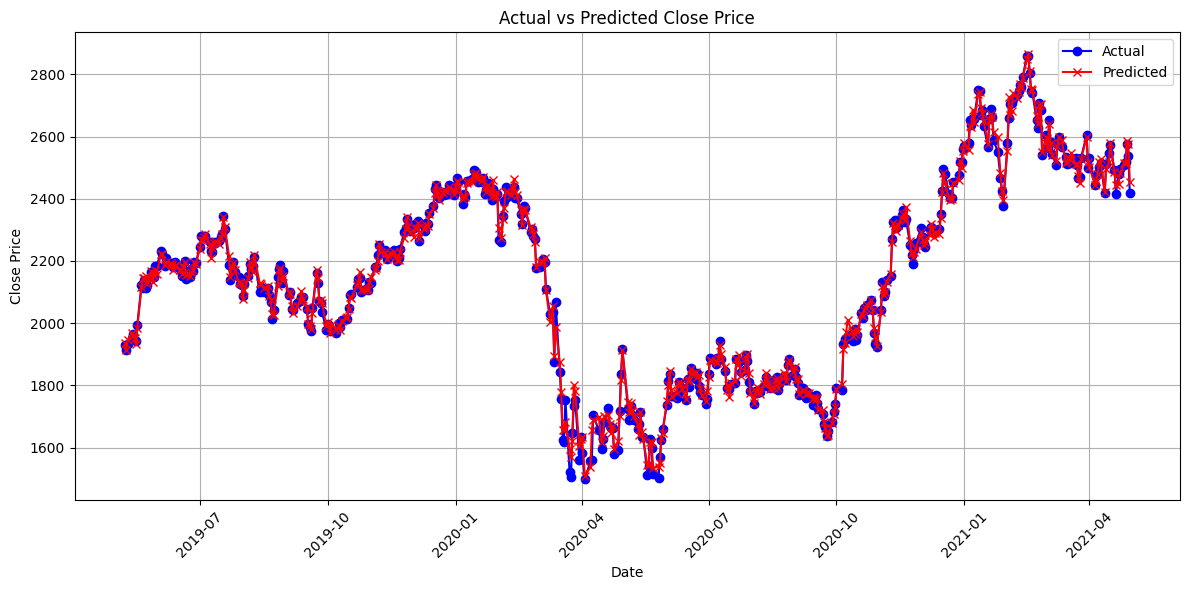

Mean Squared Error: 285.89473263657004
R^2 Score: 0.9970961696617076


In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt

# Function to preprocess data
def preprocess_data(df):
    df = df.dropna()

    # Feature scaling
    scaler = StandardScaler()
    X = df[['Open', 'High', 'Low', 'Volume']]
    y = df['Close']

    X_scaled = scaler.fit_transform(X)

    # Use time-based split
    split_index = int(len(df) * 0.8)
    X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    return X_train, X_test, y_train, y_test, scaler

# Function to train model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, mse, r2

# Function to plot raw data
def plot_raw_data(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.title('Stock Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot predictions
def plot_predictions(y_test, y_pred, y_test_dates):
    y_test_series = pd.Series(y_test.values, index=y_test_dates)
    y_pred_series = pd.Series(y_pred, index=y_test_dates)

    plt.figure(figsize=(12, 6))

    plt.plot(y_test_series.index, y_test_series.values, label='Actual', marker='o', color='blue')
    plt.plot(y_pred_series.index, y_pred_series.values, label='Predicted', marker='x', color='red')

    plt.title('Actual vs Predicted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prototype/HDFC.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Filter data based on selected date range
start_date = df.index.min()
end_date = df.index.max()
filtered_df = df.loc[start_date:end_date]

# Ensure there's data to plot
if not filtered_df.empty:
    print("Data Preview:")
    print(filtered_df.head())

    # Preprocess data
    X_train, X_test, y_train, y_test, scaler = preprocess_data(filtered_df)

    # Train model
    model = train_model(X_train, y_train)

    # Evaluate model
    y_pred, mse, r2 = evaluate_model(model, X_test, y_test)

    # Save model
    with open('/content/drive/My Drive/Colab Notebooks/prototype/Stock.pkl', 'wb') as f:
        pickle.dump(model, f)

    # Extract dates for plotting
    y_test_dates = filtered_df.index[-len(y_test):]

    # Show raw data plot
    print("Raw Data Plot:")
    plot_raw_data(filtered_df)

    # Show predictions plot
    print("Predictions Plot:")
    plot_predictions(y_test, y_pred, y_test_dates)

    # Show performance metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

else:
    print("No data available for the selected date range.")
